<a href="https://colab.research.google.com/github/Wahiba275/Recognition_of_handwritten_digits/blob/main/Reconnaissance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import  Conv2D, Flatten, Dropout,  MaxPooling2D

In [ ]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


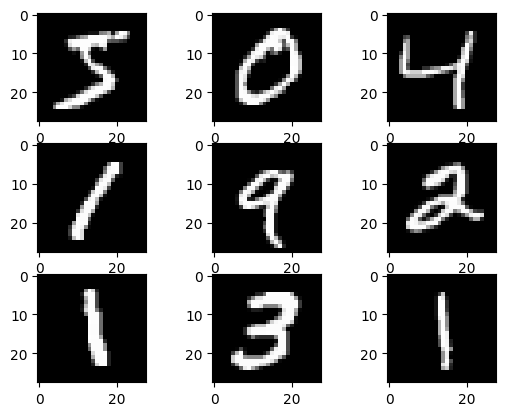

In [ ]:
#on peut changer les indices des images pour afficher d'autres images
for i in range(9):
# define subplot
   plt.subplot(330 + 1 + i)
# plot raw pixel data
   plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [ ]:
## paramètres de réglage
batch_size = 100
epochs = 12
## dimensions
num_classes = 10
img_rows, img_cols = 28, 28

In [ ]:
## encodage binaires de la variables réponses
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
N = X_train.shape[0] # 60 000 données
X_train = np.reshape(X_train, (N,28,28,1))
X_test = np.reshape(X_test, (X_test.shape[0],28,28,1))
X_train = X_train/255 # normalisation
X_test = X_test/255
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], "images pour l'apprentissage")
print(X_test.shape[0], "images de test")

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
60000 images pour l'apprentissage
10000 images de test


In [ ]:
model = Sequential()

In [ ]:
# ajout des couches au réseau de neurones
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation=Activation(tf.nn.softmax)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 128)       0         
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                        

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train,batch_size=32,epochs=10, verbose=10, validation_data=(X_test, Y_test))

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02694421075284481
Test accuracy: 0.9926000237464905


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(10000, 28, 28, 1)
313/313 [==============================] - 1s 2ms/step
7


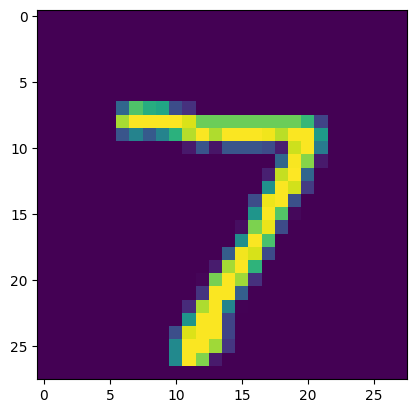

In [ ]:
#on peut changer les indices des images pour afficher d'autres images
print (X_test.shape)
plt.imshow(X_test[0])
prediction=model.predict(X_test)
print(np.argmax(prediction[0]))

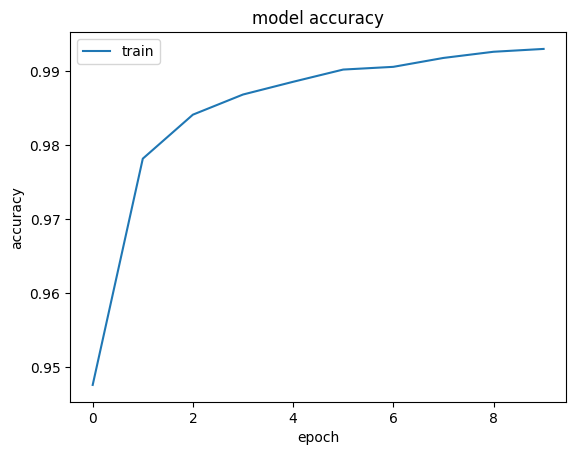

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

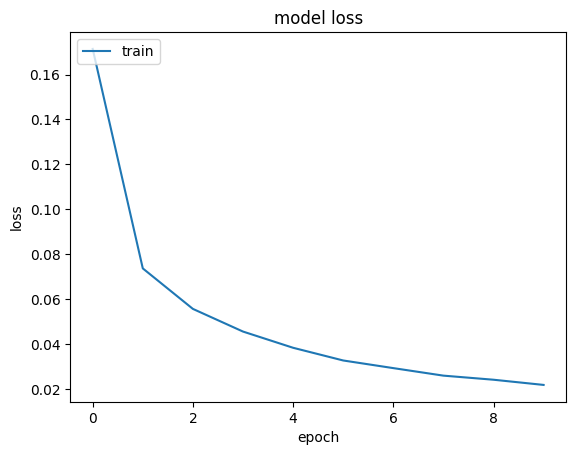

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()